In [7]:
# Imports
from collections import defaultdict
import matplotlib.pyplot as plt
import statistics
import math

In [8]:
# Globals

# Constants
IN_FILENAME = 'AP_train.txt'

# Helper functions
def read_file(in_filename=IN_FILENAME, nrows=None):
    for line in open(IN_FILENAME):
        if nrows is None:
            yield line
        elif nrows == 0:
            return
        else:
            nrows -= 1
            yield line

def summary_statistics(data_points):
    
    def quartiles(numbers):
        sorted_numbers = sorted(numbers)
        mid = len(sorted_numbers) // 2 
        if (len(sorted_numbers) % 2 == 0):
            # even
            lowerQ = statistics.median(sorted_numbers[:mid])
            upperQ = statistics.median(sorted_numbers[mid:])
        else:
            # odd
            lowerQ = statistics.median(sorted_numbers[:mid])
            upperQ = statistics.median(sorted_numbers[mid+1:])
        return (lowerQ, upperQ)
    
    mean = statistics.mean(data_points)
    sd = statistics.stdev(data_points)
    median = statistics.median(data_points)
    q1, q3 = quartiles(data_points)
    print('Mean: {}'.format(mean))
    print('Standard Deviation: {}'.format(sd))
    print('Median: {}'.format(median))
    print('1st Quartile: {}'.format(q1))
    print('3rd Quartile: {}'.format(q3))

In [9]:
# Explore dataset
for line in read_file(nrows=10):
    print(line.strip().split(' ', 1))

['#index', '1']
['#*', 'Book Review: Discover Linux']
['#@', 'Marjorie Richardson']
['#t', '1998']
['#c', 'Linux Journal']
['']
['#index', '2']
['#*', 'MOSFET table look-up models for circuit simulation']
['#@']
['#t', '1984']


### 3.1 Basic Counts:

**a. Compute the number of distinct authors, publication venues, publications, and citations/references**

In [10]:
# Data structures:
authors = set()
publication_venues = set()
publications = set()
citations = set()


# Helper functions
def process_authors(authors_string):
    auth = authors_string.strip().split(';')
    auth = set([a.strip() for a in auth])
    authors.update(auth)

def process_citation(index, citation_string):
    citation = index + ' ' + citation_string
    citations.add(citation)
    
# Script
index = 0
for line in read_file():
    line = line.strip().split(' ', 1)
    try:
        if line[0] == '#index':
            index = line[1].strip()
            publications.add(index)
        elif line[0] == '#@':
            process_authors(line[1].strip())
        elif line[0] == '#c':
            publication_venues.add(line[1].strip())
        elif line[0] == '#%':
            process_citation(index, line[1].strip())
    except IndexError:
        continue
        
print('Number of distinct authors: {}'.format(len(authors)))
print('Number of distinct publication venues: {}'.format(len(publication_venues)))
print('Number of distinct publications: {}'.format(len(publications)))
print('Number of distinct citations: {}'.format(len(citations)))

Number of distinct authors: 1478734
Number of distinct publication venues: 255685
Number of distinct publications: 1976815
Number of distinct citations: 7250326


**b. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?**

In [11]:
publication_venues = set()
for line in read_file():
    line = line.strip().split(' ', 1)
    try:
        if line[0] == '#c' and 'Principles and Practice of Knowledge Discovery in Databases' in line[1]:
            publication_venues.add(line[1].strip())
    except IndexError:
        continue

for i, pv in enumerate(publication_venues):
    print(i, pv)
        

0 PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases
1 PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
2 PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
3 Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)
4 Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)


The numbers in item a. are not likely to be accurate. For example, the same publication venue might be named a little differently each time as seen above, or the same author might be repeated in the dataset with their shortened or full names.

### 3.2 Publications, Authors, Venues

**a. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis).**

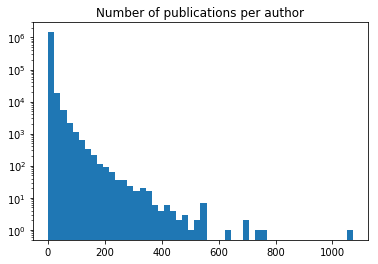

In [12]:
# Data Structures
author_publications = defaultdict(list)

# Helper functions
def get_authors(authors_string):
    auth = authors_string.strip().split(';')
    auth = set([a.strip() for a in auth])
    return auth
    
# Script
index = 0
for line in read_file(nrows=None):
    line = line.strip().split(' ', 1)
    try:
        if line[0] == '#index':
            index = line[1].strip()
        elif line[0] == '#@':
            authors = get_authors(line[1].strip())
            for author in authors:
                author_publications[author].append(index)
    except IndexError:
        continue

num_pubs_per_author = [len(v) for k, v in author_publications.items()]
plt.hist(num_pubs_per_author, bins=50, log=True)
plt.title('Number of publications per author')
plt.show()

**b. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.**

In [13]:
# Statistical Summary
print('Summary for the number of publications per author:')
summary_statistics(num_pubs_per_author)

Summary for the number of publications per author:
Mean: 3.2907872545028383
Standard Deviation: 8.86933557536909
Median: 1.0
1st Quartile: 1
3rd Quartile: 2


By looking at the above summary statistics, we see that the mean is greater than the 3rd quartile. This shows that the value of the mean is being shifted to the right due to outliers having a high value. Hence, for this dataset, the median is a better approximation of the average number of publications per author than the mean.

**c. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?**

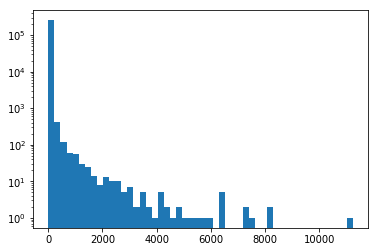

Summary for the number of publications per venue:
Mean: 7.7309658368695855
Standard Deviation: 83.38107059526949
Median: 1
1st Quartile: 1.0
3rd Quartile: 1.0
Venue with the largest number of publications: IEEE Transactions on Information Theory


In [14]:
# Data Structures
venue_publications = defaultdict(list)
    
    
# Script
index = 0
for line in read_file():
    line = line.strip().split(' ', 1)
    try:
        if line[0] == '#index':
            index = line[1].strip()
        elif line[0] == '#c':
            venue = line[1].strip()
            venue_publications[venue].append(index)
    except IndexError:
        continue

# Histogram        
num_pubs_per_venue = [len(v) for k, v in venue_publications.items()]
plt.hist(num_pubs_per_venue, bins=50, log=True)
plt.show()

# Statistical Summary
print('Summary for the number of publications per venue:')
summary_statistics(num_pubs_per_venue)

# Venue with the largest number of publications
max_venue = max(venue_publications, key=lambda x:len(venue_publications[x]))
print('Venue with the largest number of publications: {}'.format(max_venue))

### References, Citations, Impact

**a. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?**

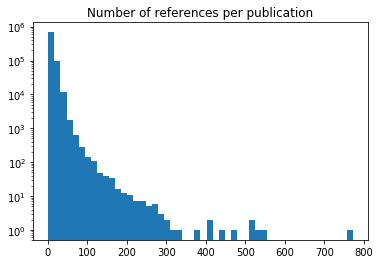

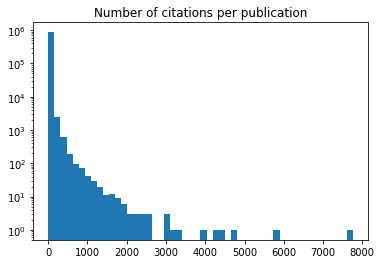

Publication with the largest number of references: 719353
Publication with the largest number of citations: 408396


In [15]:
# Data Structures
pub_references = defaultdict(list)
pub_citations = defaultdict(list)
    
# Script
index = 0
for line in read_file():
    line = line.strip().split(' ', 1)
    try:
        if line[0] == '#index':
            index = line[1].strip()
        elif line[0] == '#%':
            reference = line[1].strip()
            pub_references[index].append(reference)
            pub_citations[reference].append(index)
    except IndexError:
        continue

# Histograms      
num_refs_per_pub = [len(v) for k, v in pub_references.items()]
plt.hist(num_refs_per_pub, bins=50, log=True)
plt.title('Number of references per publication')
plt.show()

num_cits_per_pub = [len(v) for k, v in pub_citations.items()]
plt.hist(num_cits_per_pub, bins=50, log=True)
plt.title('Number of citations per publication')
plt.show()

# Publication with the largest number of references
max_references = max(pub_references, key=lambda x:len(pub_references[x]))
print('Publication with the largest number of references: {}'.format(max_references))        

# Publication with the largest number of citations
max_citations = max(pub_citations, key=lambda x:len(pub_citations[x]))
print('Publication with the largest number of citations: {}'.format(max_citations))        

To me, it's hard to fathom a publication that has 719353 references. However, a publication having 408396 citations seems reasonable.

**b. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results.**

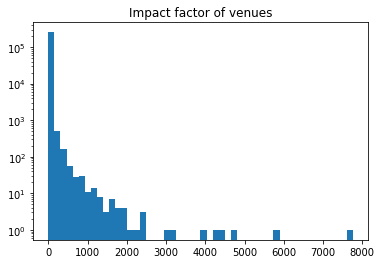

In [16]:
# Data Structures
venue_impact = defaultdict(list)
    

# Script
for venue, publications in venue_publications.items():
    impact = sum([len(pub_citations[pub]) for pub in publications]) / float(len(publications))
    venue_impact[venue] = impact

# Histogram
plt.hist(list(venue_impact.values()), bins=50, log=True)
plt.title('Impact factor of venues')
plt.show()

**c. What is the venue with the highest apparent impact factor? Do you believe this number?**

In [19]:
# Venue with the highest apparent impact factor
max_impact_venue = max(venue_impact, key=lambda x:venue_impact[x])
print('Venue with the highest apparent impact factor: {}'.format(max_impact_venue))        
print('Max impact factor: {}'.format(venue_impact[max_impact_venue]))


Venue with the highest apparent impact factor: Computers and Intractability: A Guide to the Theory of NP-Completeness
Max impact factor: 7753.0


The maximum impact factor as seen above seems unreasonably high to be believable

**d. Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?**

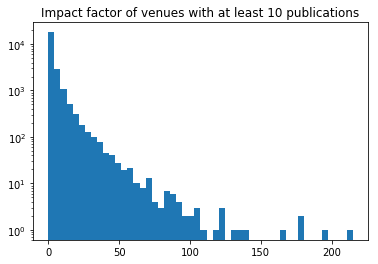

Citation counts for publications at venue: Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications
340164 : 167
340165 : 115
340166 : 48
340167 : 11
340168 : 138
340169 : 50
340170 : 10
340171 : 11
340172 : 112
340173 : 103
340174 : 27
340175 : 2140
340176 : 1609
340177 : 87
340178 : 22
340179 : 67
340180 : 19
340181 : 28
340182 : 22
340183 : 21
340184 : 42
340185 : 46
340187 : 46

Mean/Impact factor of citations for venue Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications : 214.82608695652175
Median number of citations for venue Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications : 46


In [20]:
# Data Structures
venue_impact = defaultdict(float)
    
# Script
for venue, publications in venue_publications.items():
    if len(publications) >= 10:
        impact = sum([len(pub_citations[pub]) for pub in publications]) / float(len(publications))
        venue_impact[venue] = impact

# Histogram
plt.hist(list(venue_impact.values()), bins=50, log=True)
plt.title('Impact factor of venues with at least 10 publications')
plt.show()

# Venue with the highest apparent impact factor
max_impact_venue = max(venue_impact, key=lambda x:venue_impact[x])
print('Citation counts for publications at venue: {}'.format(max_impact_venue))
for pub in venue_publications[max_impact_venue]:
      print('{} : {}'.format(pub, len(pub_citations[pub])))

# Mean and Median number of citations for the venue with the highest apparent impact factor
median = statistics.median(([len(pub_citations[pub]) for pub in venue_publications[max_impact_venue]]))
print('\nMean/Impact factor of citations for venue {} : {}'.format(max_impact_venue, venue_impact[max_impact_venue]))
print('Median number of citations for venue {} : {}'.format(max_impact_venue, median))

**e. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.**

In [21]:
# Data Structures
year_publications = defaultdict(list)
year_avg_ref = defaultdict(float)
year_avg_cit = defaultdict(float)

# Script
index = 0
for line in read_file():
    line = line.strip().split(' ', 1)
    try:
        if line[0] == '#index':
            index = line[1].strip()
        elif line[0] == '#t':
            year = line[1].strip()
            year_publications[year].append(index)
    except IndexError:
        continue

for year, publications in year_publications.items():
    year_avg_ref[year] = sum([len(pub_references[pub]) for pub in publications]) / float(len(publications))
    year_avg_cit[year] = sum([len(pub_citations[pub]) for pub in publications]) / float(len(publications))


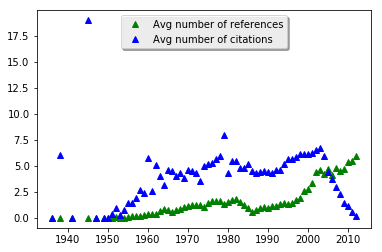

In [22]:
# Plot of the avg number of references and citations per year
x = sorted(year_publications)
y1 = [year_avg_ref[year] for year in x]
y2 = [year_avg_cit[year] for year in x]
fig, ax = plt.subplots()
ax.plot(x, y1, 'g^', label='Avg number of references')
ax.plot(x, y2, 'b^', label='Avg number of citations')
legend = ax.legend(loc='upper center', shadow=True)
plt.show()